In [42]:
import os
import cv2
import random
import mmcv
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.font_manager import _rebuild
from PIL import Image
from imantics import Polygons, Mask
from matplotlib.collections import PatchCollection
from pycocotools import mask as maskUtils
from pycocotools.coco import COCO

plt.rc('figure', figsize=(10, 5))
plt.rcParams['font.sans-serif'] = ['SimHei']
_rebuild()


train_img_prefix = 'data/dataset/train_images'
test_img_prefix = 'data/dataset/test_a_images'

gt_fp = 'data/dataset/val.json'
submit_fp = '/home/arias/Datasets/jinnan2/submit/val_04-07_21:32_CascadeRCNN_ResNeXt_normal_with_mixup_mIOU_0.6696.json'
submit_js = mmcv.load(submit_fp)

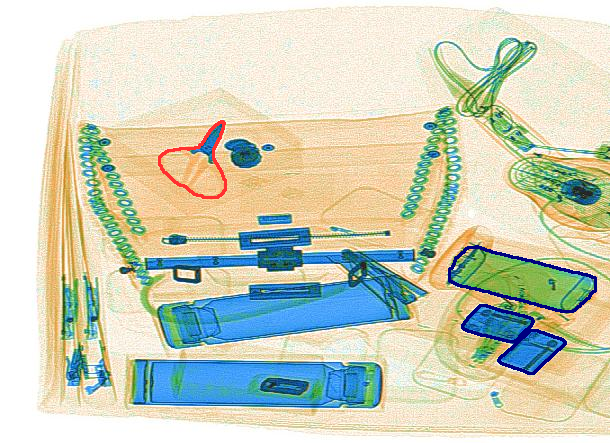

In [58]:
def show_rle_masks(img, rle_masks):
    img = img.copy()
    
    color_map = {
        "1": [0, 0, 128],
        "2": [100, 149, 237],
        "3": [0, 238, 0],
        "4": [255, 255, 0],
        "5": [255, 48, 48],}

    for category_id, rle in rle_masks.items():
        mask = maskUtils.decode(rle)
        polygons = Mask(mask).polygons()
        pts = polygons.points
        cv2.polylines(img, pts, True, color_map[category_id], 2)
    return img

filename = random.choice(list(submit_js.keys()))
img = cv2.imread(os.path.join(test_img_prefix, filename))
if img is None:
    img = cv2.imread(os.path.join(train_img_prefix, filename))
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

rle_masks = submit_js[filename]['mask']
masked_img = show_rle_masks(img, rle_masks)
Image.fromarray(masked_img)

In [39]:
coco = COCO(gt_fp)


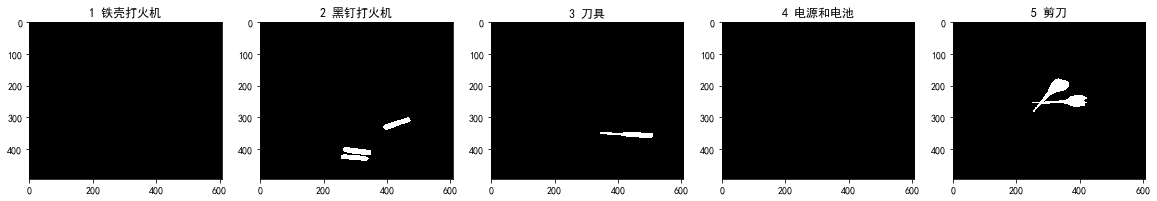

In [28]:
def id_to_name(category_id):
    id_name_map = {
        "1": "铁壳打火机",
        "2": "黑钉打火机", 
        "3": "刀具",
        "4": "电源和电池",
        "5": "剪刀",
    }
    if isinstance(category_id, int):
        category_id = str(category_id)
    return id_name_map[category_id]

plt.figure(figsize=(20, 5))

for category_id, rle in rle_masks.items():
    m = maskUtils.decode(rle)
    plt.subplot(1, 5, int(category_id))
    plt.imshow(m, cmap='gray')
    plt.title(f"{category_id} {id_to_name(category_id)}")